Name - Shreeyash Khalate<br/>
Project - Twitter Sentiment Analysis

## Importing the required libraries

In [161]:
import pandas as pd
import re
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt


## Loading the Dataset

This is synthetic (fake, semi-randomly generated) twitter data.

In [162]:
df = pd.read_csv("project_twitter_data.csv")
df

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [163]:
# Now we don't need the "id" column
df = df.drop("id",axis = "columns")
df

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."
...,...
17192,thought factory: left-right polarisation! #tru...
17193,feeling like a mermaid ð #hairflip #neverre...
17194,#hillary #campaigned today in #ohio((omg)) &am...
17195,"happy, at work conference: right mindset leads..."


In [164]:
# To reduce the computation time, we extract only 200 tweets from the above dataframe

df = df.head(200)
df

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."
...,...
195,can #lighttherapy help with or #depression? ...
196,aww yeah it's all good bing bong bing bong
197,selfie srelfie! #smile #me #selfie #followme...
198,how vera rubin overcame and invented a whole ...


## Data Cleaning

In [165]:
# Cleaning the text by using regular expressions

def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removing @mentions by substituting them with empty string
    text = re.sub(r'#', '', text) # Removing hashtags
    text = re.sub(r'RT[\s]+', '', text) # Removing Retweets
    text = re.sub(r'https?;\/\/\S+', '', text) # Removing hyperlinks
    
    return text

# Applying above function on dataframe
df["tweet"] = df["tweet"].apply(clean)

# Printing cleaned dataframe
df

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,tweet
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone to see the ...
2,safe ways to heal your acne!! altwaystoheal...
3,is the hp and the cursed child book up for res...
4,"3rd bihday to my amazing, hilarious nephew e..."
...,...
195,can lighttherapy help with or depression? ...
196,aww yeah it's all good bing bong bing bong
197,selfie srelfie! smile me selfie followme f4f...
198,how vera rubin overcame and invented a whole ...


## Computing Subjectivity

In [166]:
# Function to obtain Subjectivity (means more opinion or emotion based sentiment)

def getSub(text):
    return TextBlob(text).sentiment.subjectivity

## Computing Polarity

In [167]:
# Function to obtain Polarity (which tells how positive or negative the sentiment of text is)

def getPol(text):
    return TextBlob(text).sentiment.polarity

In [168]:
# Apply on dataframe and store in two new columns

df["Subjectivity"] = df["tweet"].apply(getSub)
df["Polarity"] = df["tweet"].apply(getPol)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [169]:
df

,tweet,Subjectivity,Polarity
0,studiolife aislife requires passion dedication...,0.000000,0.000000
1,white supremacists want everyone to see the ...,0.227273,0.068182
2,safe ways to heal your acne!! altwaystoheal...,0.500000,0.781250
3,is the hp and the cursed child book up for res...,1.000000,0.500000
4,"3rd bihday to my amazing, hilarious nephew e...",0.633333,0.408333
...,...,...,...
195,can lighttherapy help with or depression? ...,0.750000,0.750000
196,aww yeah it's all good bing bong bing bong,0.750000,0.500000
197,selfie srelfie! smile me selfie followme f4f...,0.100000,0.300000
198,how vera rubin overcame and invented a whole ...,0.400000,0.200000


## Plotting Wordcloud

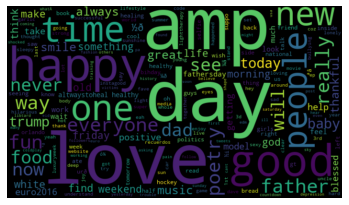

In [170]:
# Plotting the wordcloud. The more frequent the word is, the more bigger and bolder it appears in wordcloud
words = ' '.join([tweets for tweets in df["tweet"]])
wordcloud = WordCloud(width = 700, height = 400, max_font_size = 150, random_state = 42).generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Now, we can observe that the words amp, good, happy, day, love, time, etc. are more frequent words in our tweets dataset

## Computing Analysis

In [171]:
# A function to calculate whether negative, neutral or positive analysis

def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [172]:
df["Analysis"] = df["Polarity"].apply(getAnalysis)
df

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,Subjectivity,Polarity,Analysis
0,studiolife aislife requires passion dedication...,0.000000,0.000000,Neutral
1,white supremacists want everyone to see the ...,0.227273,0.068182,Positive
2,safe ways to heal your acne!! altwaystoheal...,0.500000,0.781250,Positive
3,is the hp and the cursed child book up for res...,1.000000,0.500000,Positive
4,"3rd bihday to my amazing, hilarious nephew e...",0.633333,0.408333,Positive
...,...,...,...,...
195,can lighttherapy help with or depression? ...,0.750000,0.750000,Positive
196,aww yeah it's all good bing bong bing bong,0.750000,0.500000,Positive
197,selfie srelfie! smile me selfie followme f4f...,0.100000,0.300000,Positive
198,how vera rubin overcame and invented a whole ...,0.400000,0.200000,Positive


In [173]:
# Printing all positive tweets
j = 1
sorted_dataframe = df.sort_values(by = ['Polarity'])

for tweet in range(sorted_dataframe.shape[0]):
    if sorted_dataframe['Analysis'][tweet] == "Positive":
        print(j, ") - ", sorted_dataframe['tweet'][tweet])
        j += 1

1 ) -    white supremacists want everyone to see the new â  birdsâ movie â and hereâs why  
2 ) -  safe ways to heal your acne!!    altwaystoheal healthy   healing!! 
3 ) -  is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   harrypotter pottermore favorite
4 ) -    3rd bihday to my amazing, hilarious nephew eli ahmir! uncle dave loves you and missesâ¦ 
5 ) -  choose to be   :) momtips 
6 ) -  delicious   food lovelife capetown mannaepicure resturantâ¦ 
7 ) -  1000dayswasted - narcosis infinite ep.. make me aware.. grinding neuro bass lifestyle   
8 ) -  one of the world's greatest spoing events   lemans24 teamaudi  
9 ) -  half way through the website now and allgoingwell very  
10 ) -  good food, good life , enjoy and   ðððððð this is called ~garlic bread~ ... iloveitâ¦ 
11 ) -  &amp; love &amp; hugs &amp; kisses too! how to keep your baby     parenting healthcare
12 ) -  thought factory: bbc neutral

In [174]:
# Printing all negative tweets
j = 1
sorted_dataframe = df.sort_values(by = ['Polarity'], ascending = False)

for tweet in range(sorted_dataframe.shape[0]):
    if sorted_dataframe['Analysis'][tweet] == "Negative":
        print(j, ") - ", sorted_dataframe['tweet'][tweet])
        j += 1

1 ) -  something inside me dies ð¦ð¿â¨  eyes ness smokeyeyes tired  lonely sof grungeâ¦ 
2 ) -      i will never understand why my dad left me when i was so young.... :/ deep inthefeels  
3 ) -  i'll stand behind this guncontrolplease   senselessshootings taketheguns comicrelief stillsad 
4 ) -    got my  limited edition rain or shine set today!!  !     
5 ) -  never been this down on myself in my entire life.  
6 ) -   chick gets fucked hottest naked lady 
7 ) -  i'll never be 120 again i'm   i'm a thick women blacktina
8 ) -  orangechicken   attack bull game 3d: do you really think that his head was empty around the city. each side 
9 ) -  my granddaughter's 1st bihday is tomorrow.  going to pick her play house, little car, &amp; pool today.   ððððððð
10 ) -    6 chapters left of my book &amp; then it's nearly complete kruella adaughterstale it will be a hard read emotional funnyâ¦
11 ) -  trying out another way to make sourdough bread, this one may be und

In [175]:
# Printing all Neutral tweets
j = 1
sorted_dataframe = df.sort_values(by = ['Polarity'], ascending = False)

for tweet in range(sorted_dataframe.shape[0]):
    if sorted_dataframe['Analysis'][tweet] == "Neutral":
        print(j, ") - ", sorted_dataframe['tweet'][tweet])
        j += 1

1 ) -  studiolife aislife requires passion dedication willpower   to find newmaterialsâ¦ 
2 ) -  finishedtattooinkedinkloveitâ¤ï¸ â¤ï¸â¤ï¸â¤ï¸â¤ï¸ thanksaleeee !!! 
3 ) -  i ate,i ate and i ate...ðð   jamaisasthi fish curry prawn hilsa foodfestival foodies 
4 ) -  ð­ðð girls   sun fave @ london, united kingdom 
5 ) -        levyrroni recuerdos memoriesð­â¤ðð«ð recuerdos    friends life triunfodelamor 
6 ) -  my mind is like ððð½ð but my body like ðð´ðµð½....   sleepy stillallinð
7 ) -  check  twitterww - trends: "trending worldwide 11:14 am bst"1. oscarpistorius2. diplomalÄ±liselilerayakta3.  â¦
8 ) -  suppo the taiji fisherman! no bullying! no racism! tweet4taiji thecove seashepherd 
9 ) -  i say we because i'm speaking collectively. i've always known. 2016 showed a lot.  andâ¦ 
10 ) -  wish we could talk  
11 ) -   snow white --&gt; open! --&gt; sleepy,  , sneezy and bashful. @ or dm us today! [] 
12 ) -  it wasn't me  lott

## Scatter Plot - Polarity Vs Subjectivity

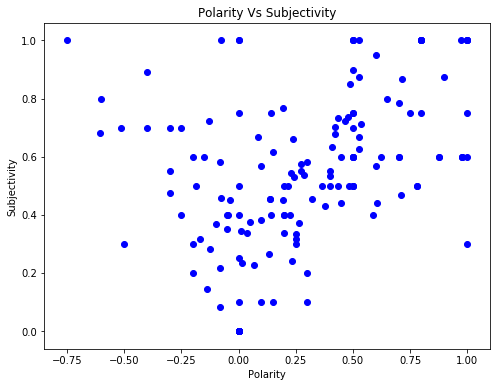

In [176]:
# Plotting the Polarity and Subjectivity
plt.figure(figsize = (8,6))
for i in range(df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
    
plt.title("Polarity Vs Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

Now we can visualize the polarity of the tweets on the scatter plot. We can see that the majority of the tweets lie on the Positive side of the sentiment.

## Percentage of Positive, Negative and Neutral Tweets

In [177]:
# So let's compute the percentage of positive tweets for accurate analysis

postweets = df[df.Analysis == "Positive"]["tweet"]

round((postweets.shape[0] / df.shape[0]) * 100, 1)

54.0

In [178]:
# Also let's compute the percentage of negative tweets for accurate analysis

negtweets = df[df.Analysis == "Negative"]["tweet"]

round((negtweets.shape[0] / df.shape[0]) * 100, 1)

15.5

In [179]:
# Also let's compute the percentage of neutral tweets for accurate analysis

netweets = df[df.Analysis == "Neutral"]["tweet"]

round((netweets.shape[0] / df.shape[0]) * 100, 1)

30.5

In [180]:
# Show the value counts
df["Analysis"].value_counts()

Positive    108
Neutral      61
Negative     31
Name: Analysis, dtype: int64

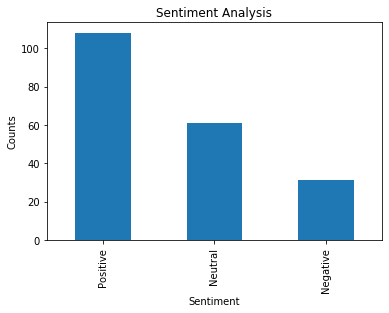

In [181]:
# Plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind = "bar")
plt.show()

#### Performed By - Shreeyash Khalate